# 7.9 Applied

In [ ]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 72.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 13.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (summarize,
poly,
ModelSpec as MS)
from statsmodels.stats.anova import anova_lm
import sklearn.model_selection as skm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split
import seaborn as sns
import sklearn as sk
from patsy import dmatrix

from pygam import (s as s_gam, l as l_gam, f as f_gam, LinearGAM, LogisticGAM)
from ISLP.transforms import (BSpline, NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam, degrees_of_freedom, plot as plot_gam, anova as anova_gam)

## Question - 6. In this exercise, you will further analyze the Wage data set considered throughout this chapter.

### (a) Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial ft to the data.

In [ ]:
wage = load_data('Wage')

In [ ]:
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [ ]:
predictors = 'age'
outcome = 'wage'

X_train, X_test, y_train, y_test = skm.train_test_split(wage[predictors], wage[outcome], test_size = 0.25, random_state = 0)

In [ ]:
def polyCrossValidation(X,y, exp):
  scores = np.array([])
  for i in range(1, exp + 1):
    poly = PolynomialFeatures(degree = i)
    model_poly = poly.fit_transform(X_train.to_frame())
    lr = LinearRegression()
    scores = np.append(scores, -np.mean(cross_val_score(lr, model_poly, y_train, scoring = 'neg_mean_squared_error',cv = 10)))
  return scores


In [ ]:
scores = polyCrossValidation(X_train, y_train , 15)

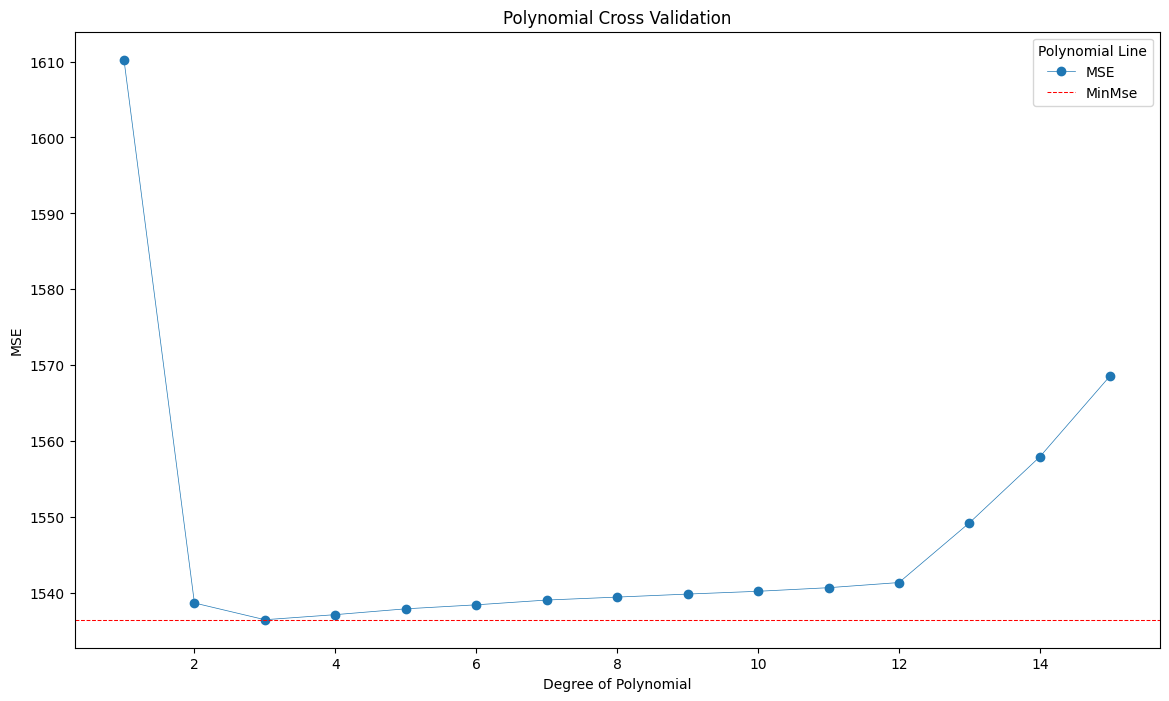

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(range(1,16), scores, marker = 'o', linewidth =.5, label = 'MSE')
plt.axhline(min(scores), color = 'red', linewidth = .75, linestyle = '--', label = 'MinMse')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.title('Polynomial Cross Validation')
plt.legend(title = 'Polynomial Line')

In [ ]:
def Anova_testing(X,y, exp):
  models = np.array([])
  for i in range(1, exp+ 1):
    poly = PolynomialFeatures(degree = i)
    poly_model = poly.fit_transform(X.to_frame())
    model = sm.OLS(y, poly_model).fit()
    models = np.append(models, model)
  print (anova_lm(*models))

In [ ]:
Anova_testing(X_train, y_train, 15)

    df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0     2248.0  3.613824e+06      0.0           NaN        NaN           NaN
1     2247.0  3.452896e+06      1.0  1.609273e+05  53.324257  3.906419e-13
2     2246.0  3.444843e+06      1.0  8.053742e+03   2.668657  1.024825e-01
3     2245.0  3.442432e+06      1.0  2.410447e+03   0.798717  3.715732e-01
4     2244.0  3.442427e+06      1.0  5.044632e+00   0.001672  9.673913e-01
5     2243.0  3.441343e+06      1.0  1.084487e+03   0.359352  5.489271e-01
6     2243.0  3.441254e+06     -0.0  8.898068e+01       -inf           NaN
7     2243.0  3.441286e+06     -0.0 -3.250816e+01        inf           NaN
8     2243.0  3.441669e+06     -0.0 -3.827714e+02        inf           NaN
9     2243.0  3.446192e+06     -0.0 -4.522902e+03        inf           NaN
10    2244.0  3.470332e+06     -1.0 -2.413984e+04   7.998885           NaN
11    2244.0  4.122077e+06     -0.0 -6.517451e+05        inf           NaN
12    2244.0  4.788924e+0

#### Results (a)

We can see that polynomial of degree 3 has the smallest Mean Squared Error. The anova said the best fit was for degree 1. We will go with degree 3 and plot it.

In [ ]:
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((750,), (2250,), (750,), (2250,))

In [ ]:
def polyDegreePlot(X_train, y_train, X_test, y_test, degree):
  poly = PolynomialFeatures(degree)
  X = poly.fit_transform(X_train.to_frame())
  y = y_train
  # X.shape

  model = LinearRegression()
  model.fit(X,y)

  X_1 = poly.fit_transform(X_test.to_frame())

  pred= model.predict(X_1)
  plt.figure(figsize = (10,6))
  plt.scatter(X_train,y_train,facecolors='none', edgecolors='darkgray', label = 'Training Data')
  plt.scatter(X_test, pred, label = 'Test Data Predictions')
  plt.xlabel('AGE')
  plt.ylabel('WAGE')
  plt.legend()
  plt.show()

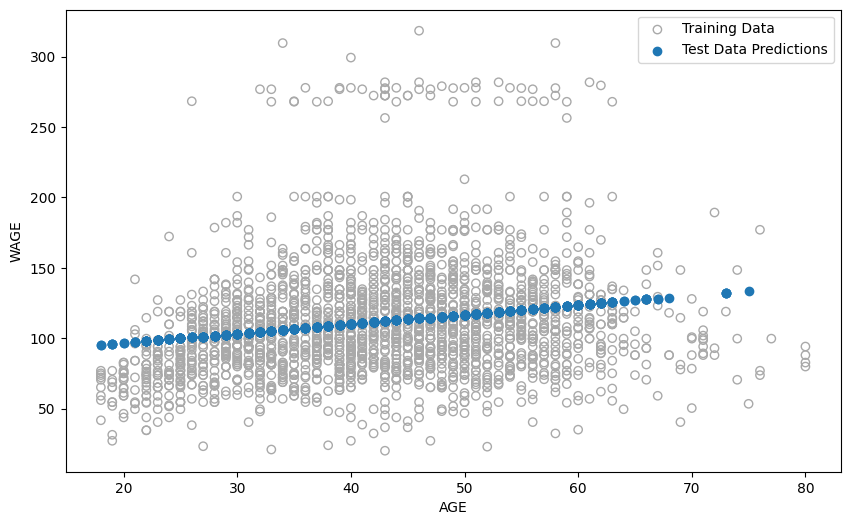

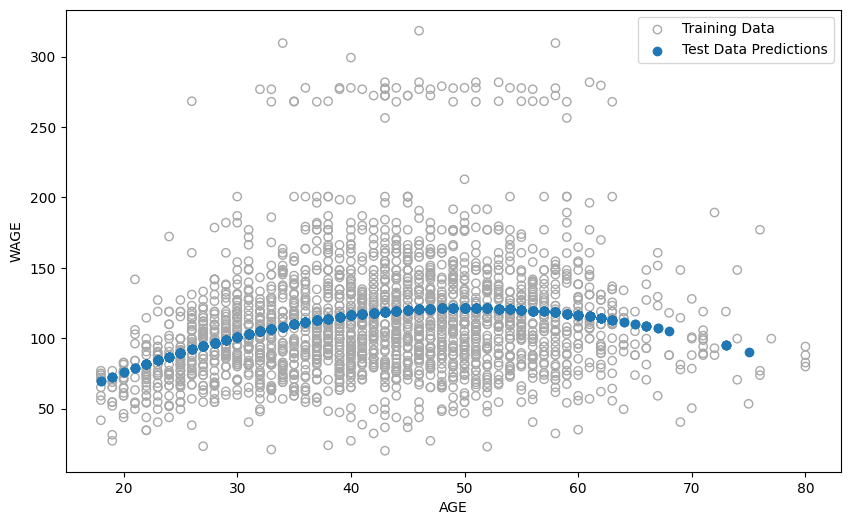

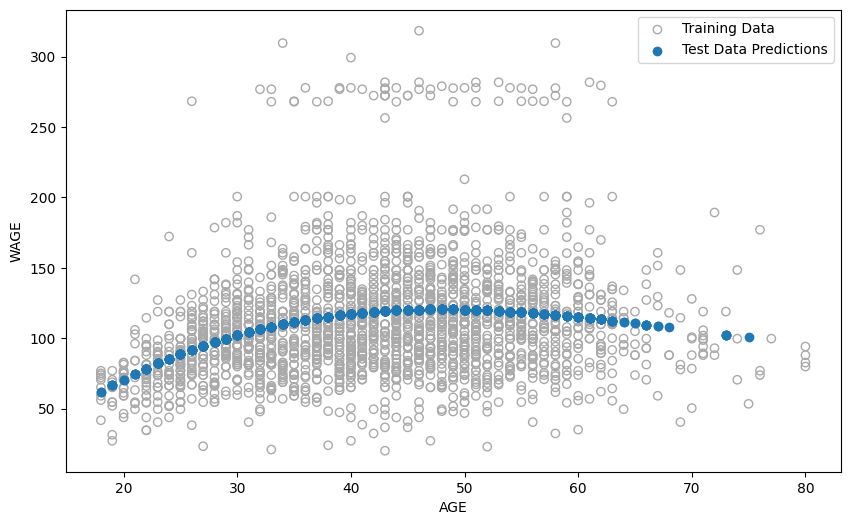

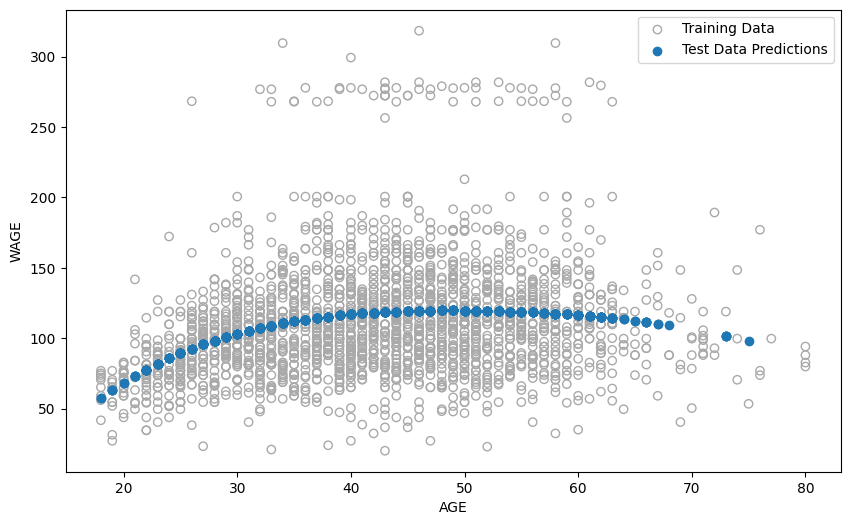

In [ ]:
polyDegreePlot(X_train, y_train, X_test, y_test, 1)
polyDegreePlot(X_train, y_train, X_test, y_test, 2)
polyDegreePlot(X_train, y_train, X_test, y_test, 3)
polyDegreePlot(X_train, y_train, X_test, y_test, 4)


###(b) Fit a step function to predict wage using age, and perform crossvalidation to choose the optimal number of cuts. Make a plot of the fit obtained.

In [ ]:
def stepFunction(X,y, X_train, y_train, cuts):
  scores = np.array([])
  for i in range(2, cuts + 1):
    lr = LinearRegression()
    cut_train = pd.cut(X,i)
    dummies = pd.get_dummies(cut_train)
    model = lr.fit(dummies,y)
    cut_test = pd.cut(X_test, i)
    dummies_test =pd.get_dummies(cut_test)
    pred = model.predict(dummies_test)
    mean_squared_error = np.mean((pred - y_test)**2)
    scores = np.append(scores, mean_squared_error)
  return scores


In [ ]:
scores = stepFunction(X_train, y_train, X_test, y_test, 30)

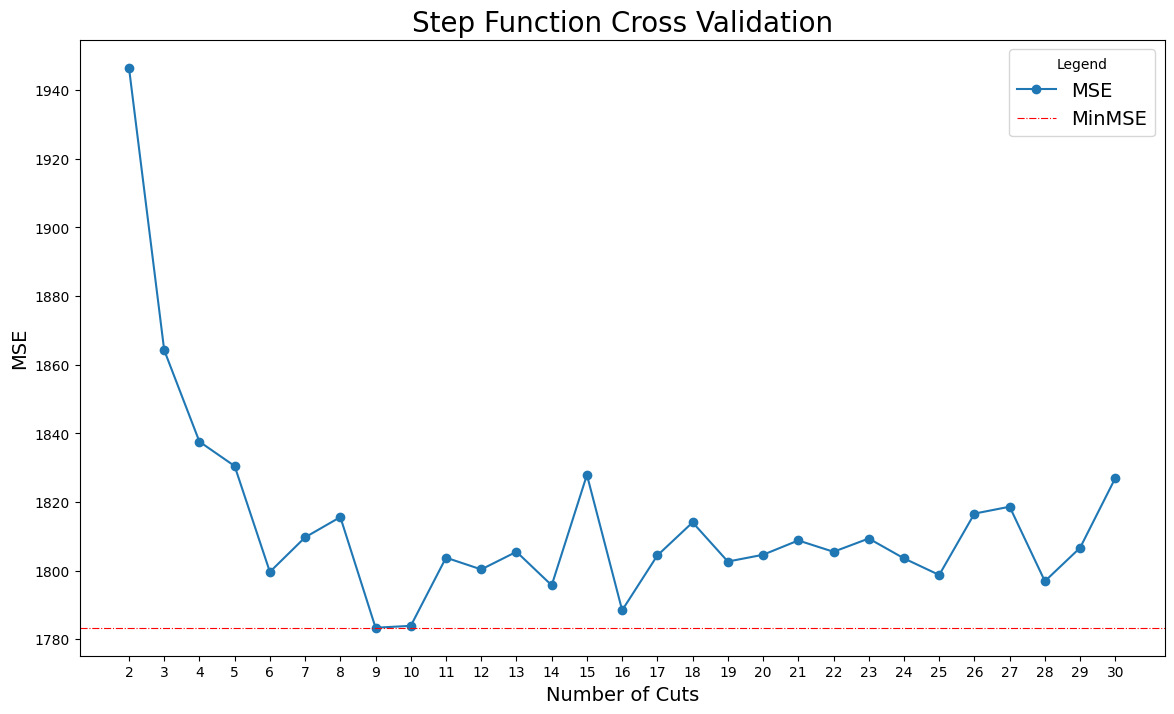

In [ ]:
plt.figure(figsize = (14,8))
plt.plot(range(2,31), scores, marker = 'o', label ='MSE')
plt.axhline(min(scores), color = 'red', linewidth = .8, linestyle = '-.', label = 'MinMSE')
plt.title('Step Function Cross Validation', fontsize = 20)
plt.xlabel('Number of Cuts', fontsize =14)
plt.ylabel('MSE', fontsize =14)
plt.xticks(range(2,31))
plt.legend(title = 'Legend', fontsize = 14)
plt.show()

In [318]:
def stepCutPlot(X_train, y_train, X_test, y_test, cuts, xName, yName):
  plt.figure(figsize = (14,8))
  lr = LinearRegression()
  cut_train = pd.cut(X_train, cuts)
  cut_test = pd.cut(X_test, cuts)
  dummies_train = pd.get_dummies(cut_train)
  dummies_test = pd.get_dummies(cut_test)
  model = lr.fit(dummies_train, y_train)
  pred = model.predict(dummies_test)

  plt.scatter(X_train, y_train, label = 'Training Data', facecolors = 'none', edgecolors = 'darkgray')
  plt.scatter(X_test, pred, label = 'Test Data Predictions')
  plt.xlabel(xName, fontsize = 14)
  plt.ylabel(yName,fontsize = 14)
  plt.legend(title = 'Legend', fontsize = 14)
  plt.title('Best Fit Step Function on Data', fontsize = 20)
  plt.show()


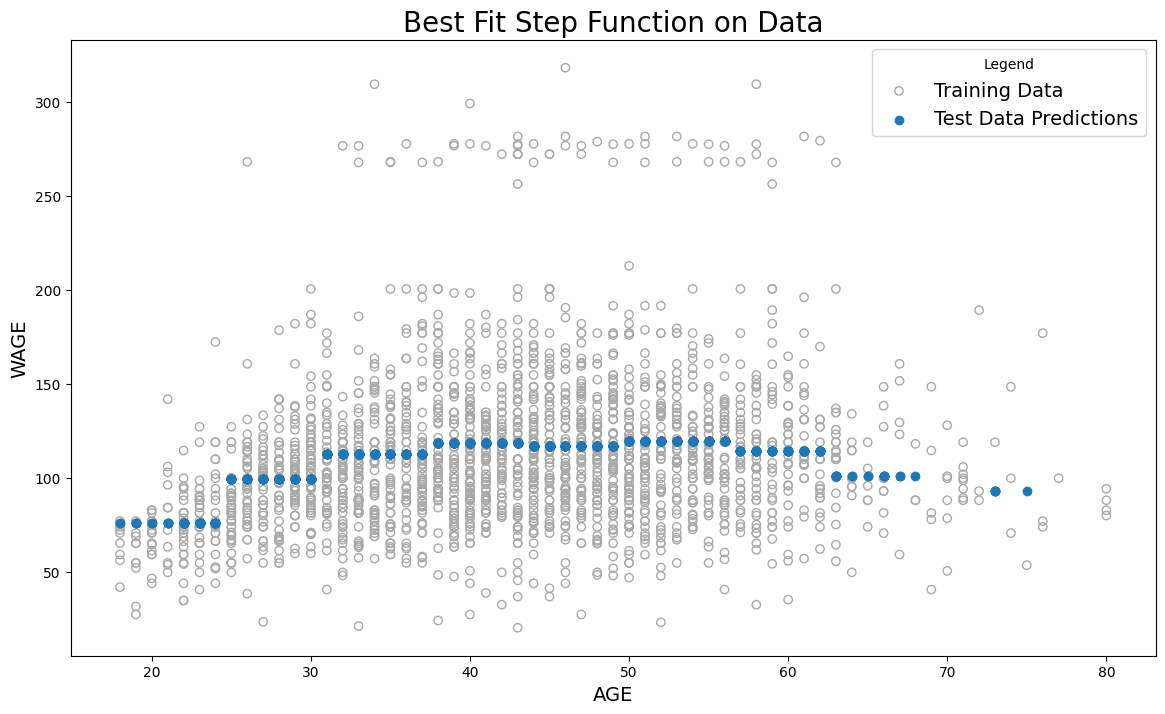

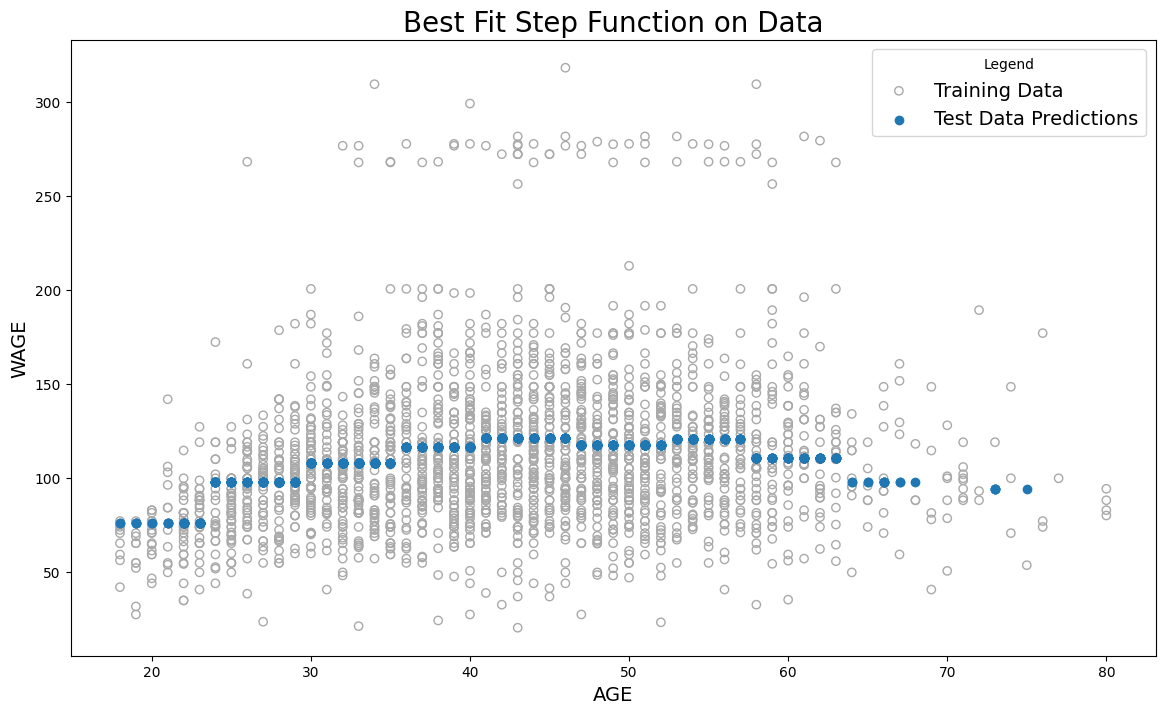

In [ ]:
stepCutPlot(X_train, y_train, X_test, y_test, 9)
stepCutPlot(X_train, y_train, X_test, y_test, 10)

## Question -7. The Wage data set contains a number of other features not explored in this chapter, such as marital status (marital), job class (jobclass), and others. Explore the relationships between some of these other predictors and wage, and use non-linear fitting techniques in order to fit fexible models to the data. Create plots of the results obtained, and write a summary of your fndings.

In [ ]:
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


### Investigated the Variables

In [ ]:
categorical = ['jobclass', 'maritl', 'education', 'region', 'health', 'health_ins', 'race']
features =['year', 'age', 'logwage', 'wage']

<Axes: >

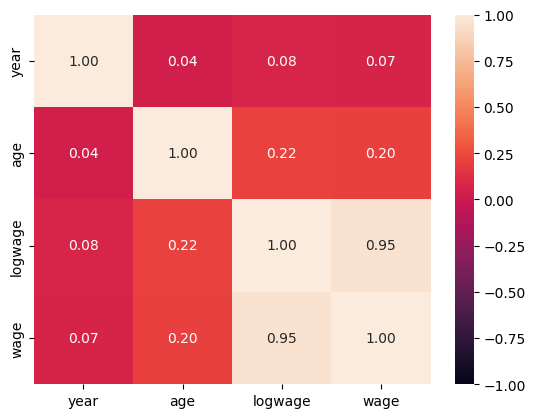

In [ ]:
sns.heatmap(wage[features].corr(), annot = True, vmin  = -1, vmax = + 1, fmt = '.2f', color = 'darkgray')

In [ ]:
# Doesn't look like year and age are strongly correlated to wage
# Log Wage feels like cheating so we will not investiage it since it is just the log of the wage.

In [ ]:
def makeBoxPlot(catgegorical):
  for var in categorical:
    plt.figure(figsize = (14,8))
    sns.boxplot(x = wage[var], y = wage['wage'])

    plt.title('Boxplot of Wage by {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('Wage')
    plt.show()

In [ ]:
def makeViolinPlot(catgegorical):
  for var in categorical:
    plt.figure(figsize = (14,8))
    sns.violinplot(x = wage[var], y = wage['wage'])
    plt.title('Violinplot of Wage by {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('Wage')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


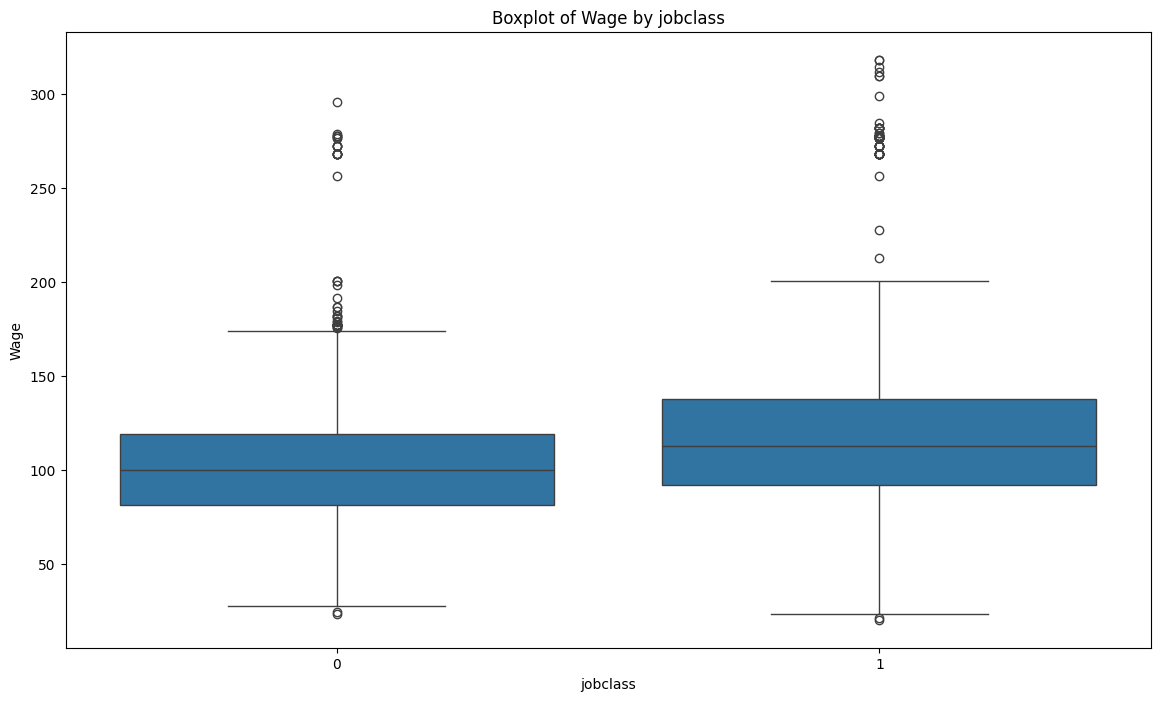

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


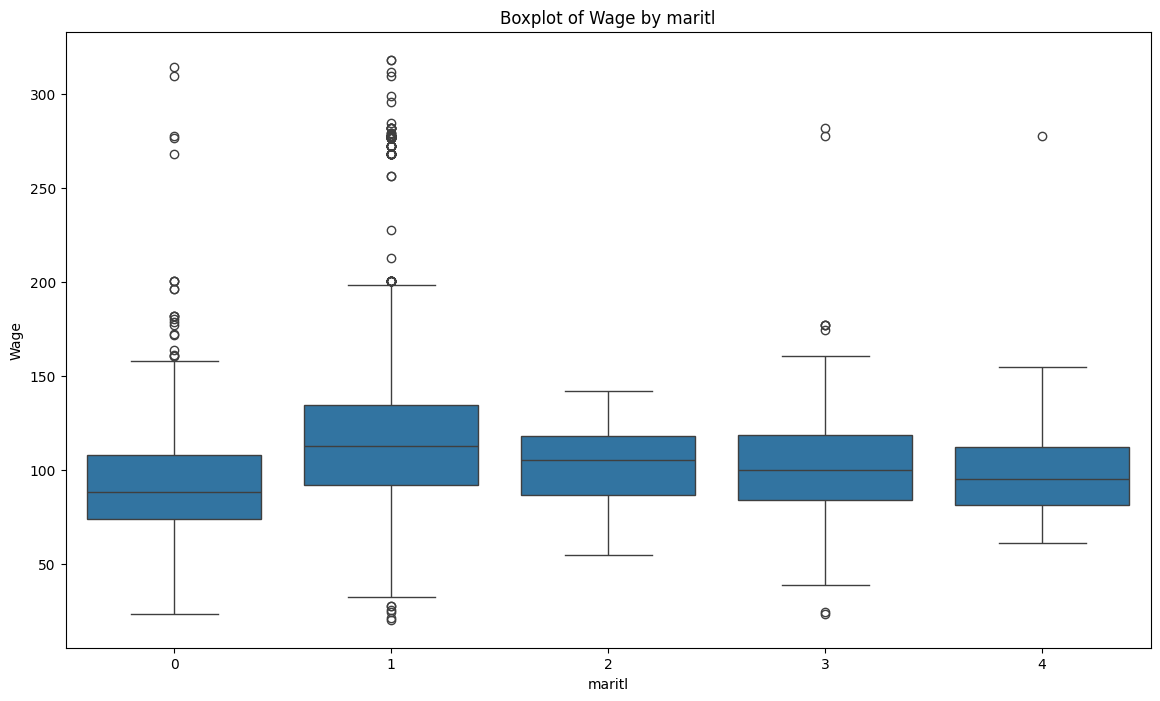

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


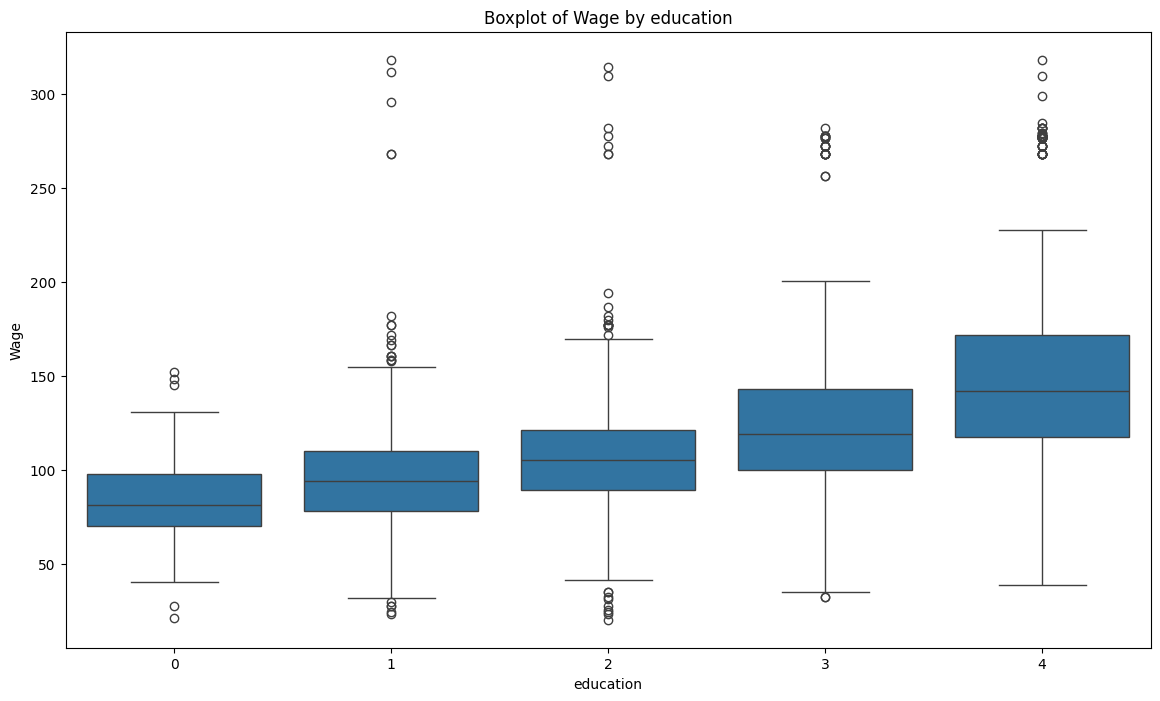

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


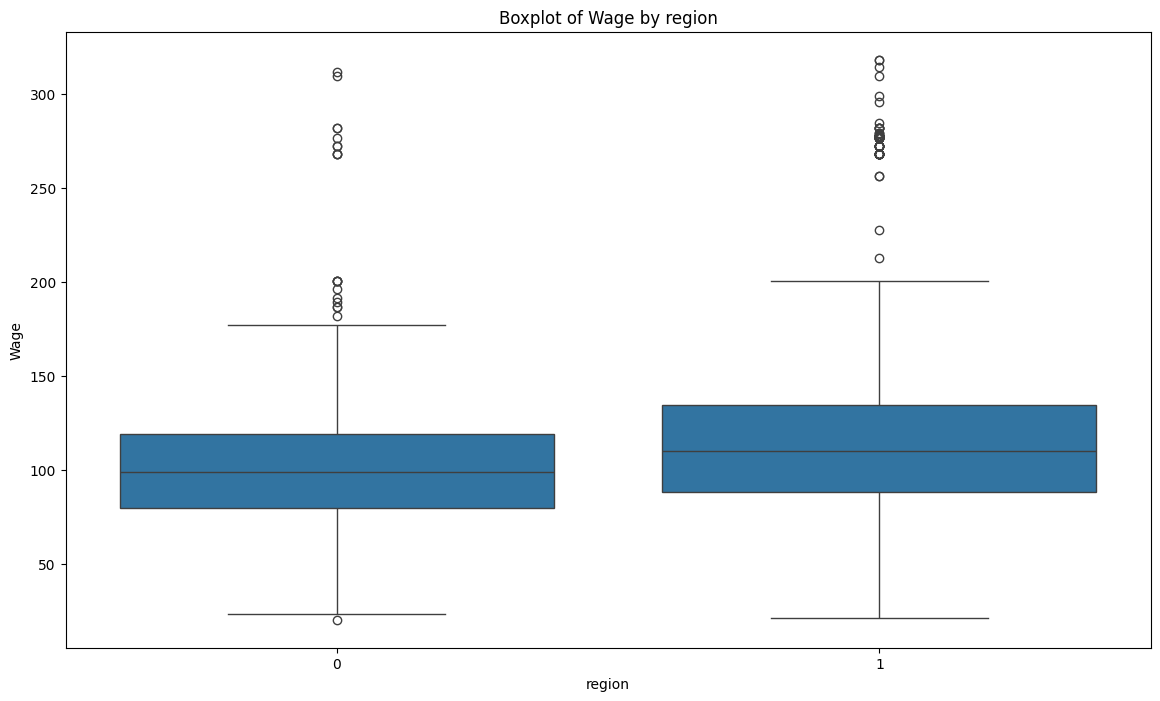

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


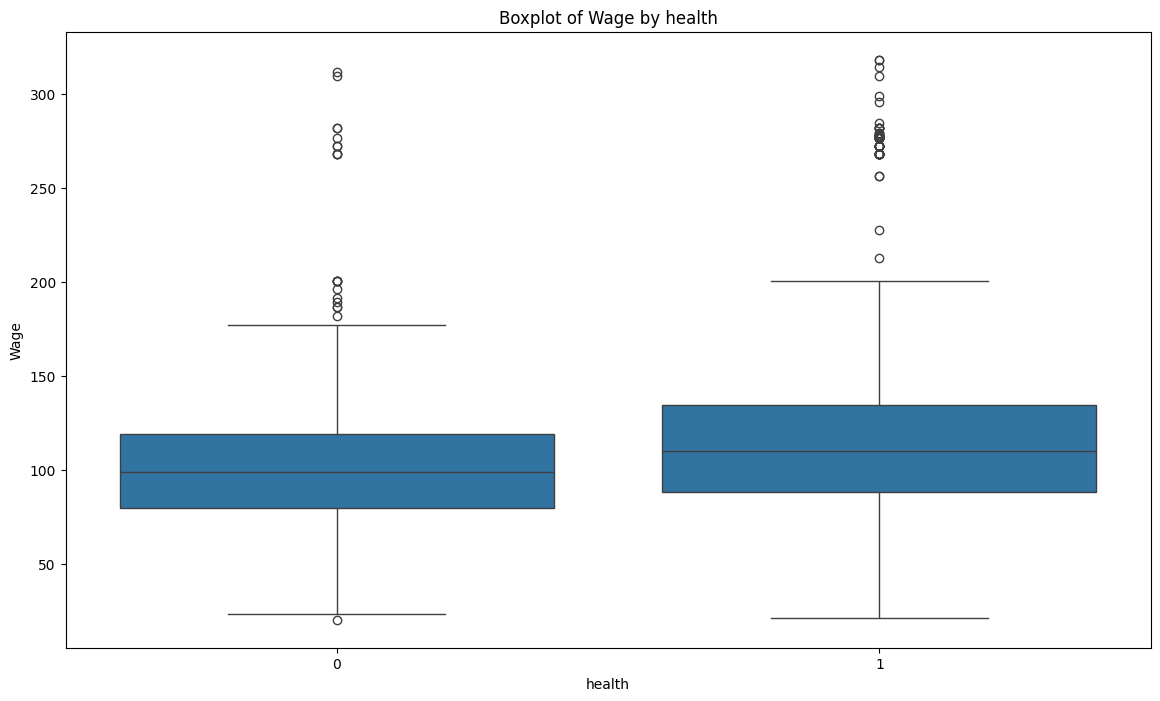

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


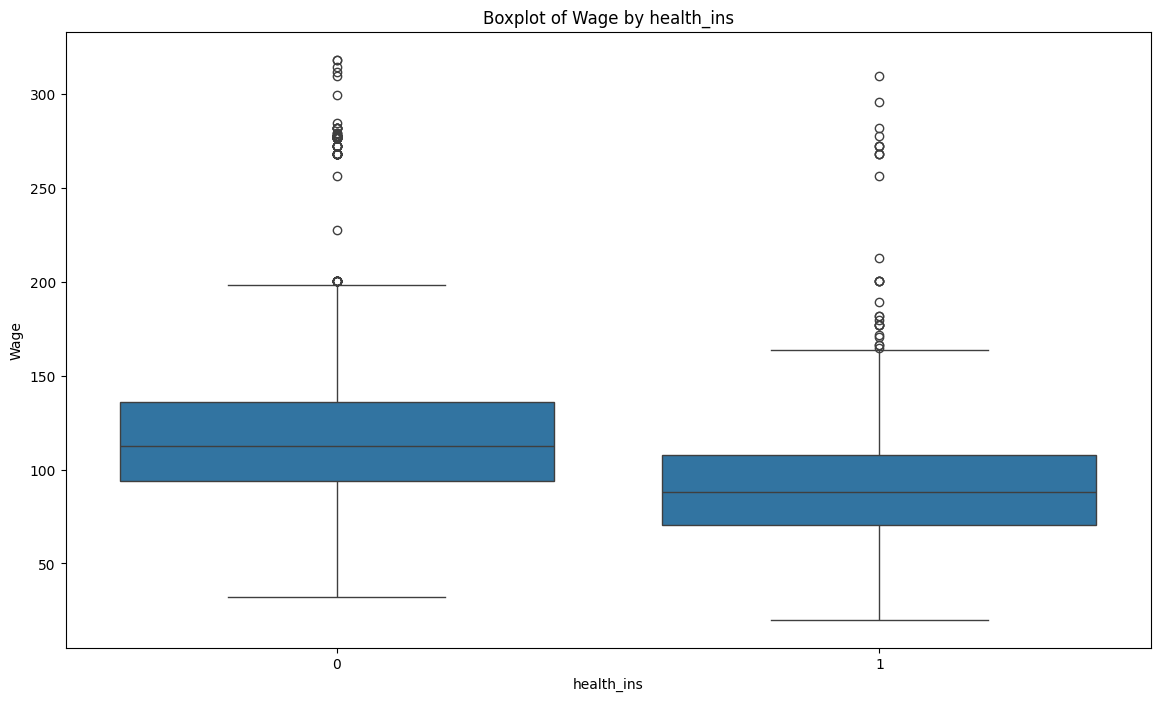

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


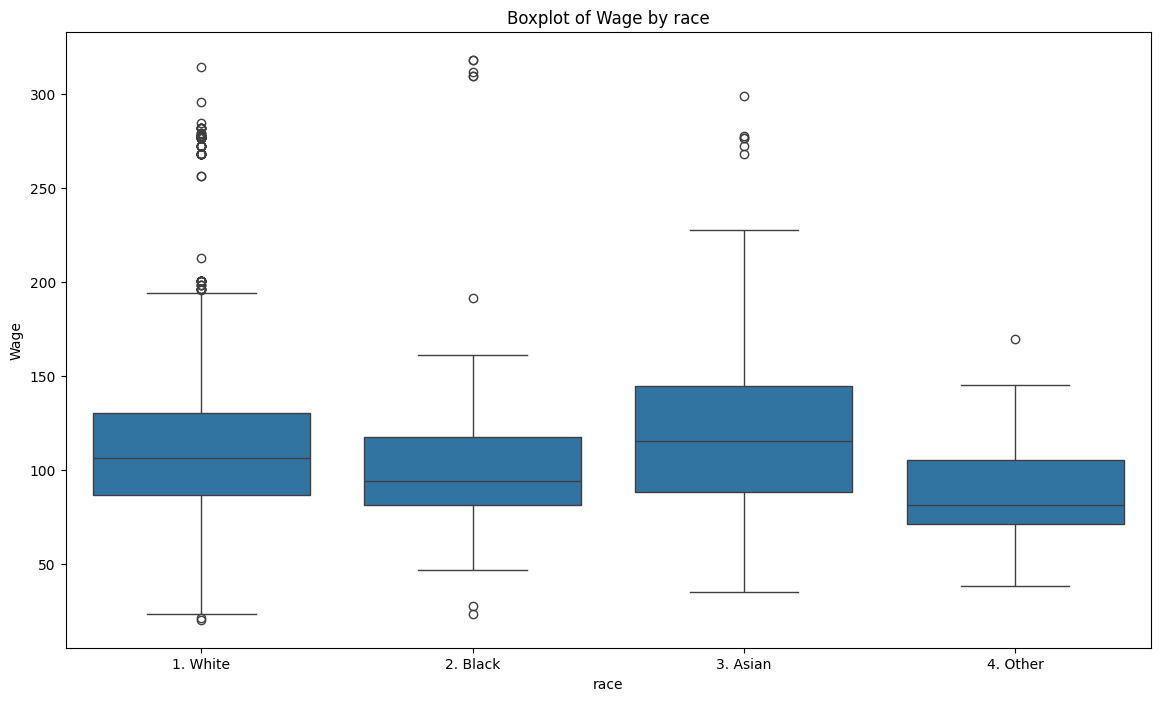

In [ ]:
akeBoxPlot(categorical)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


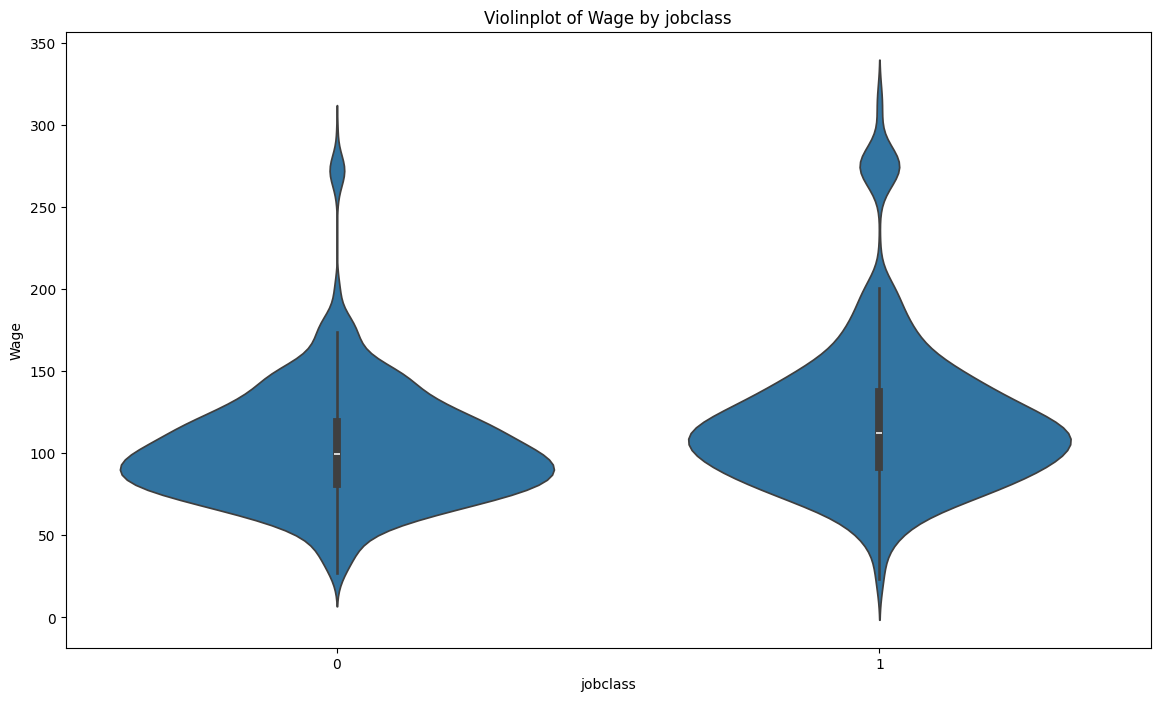

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

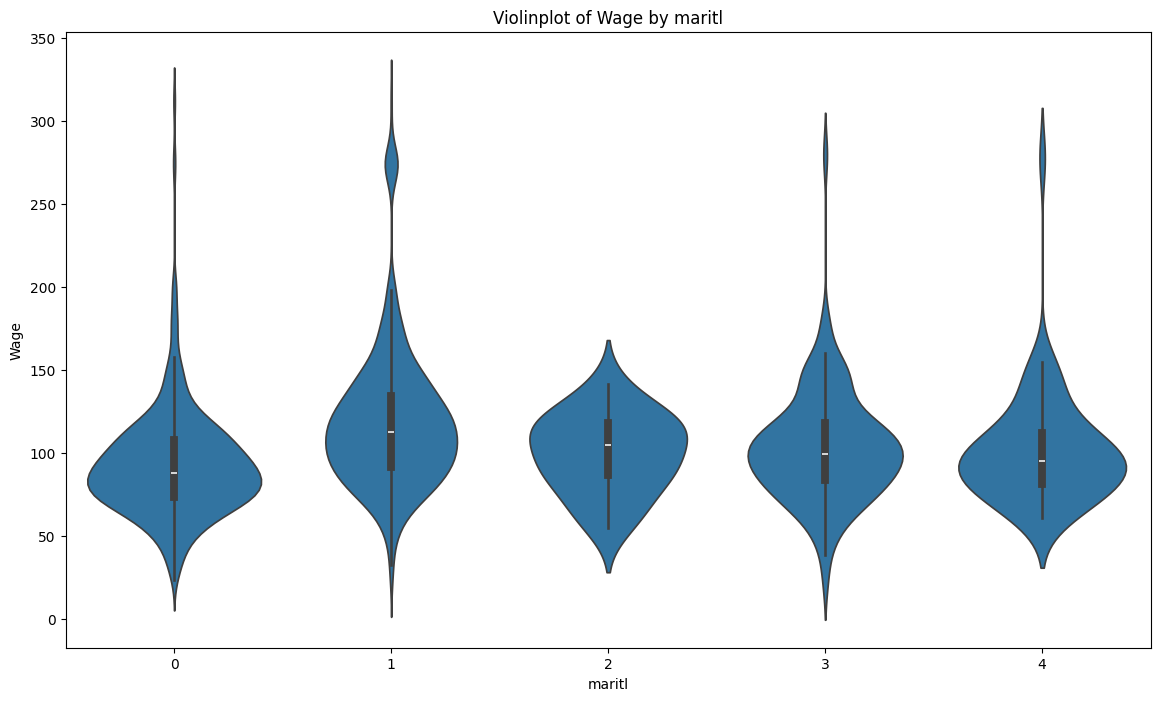

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

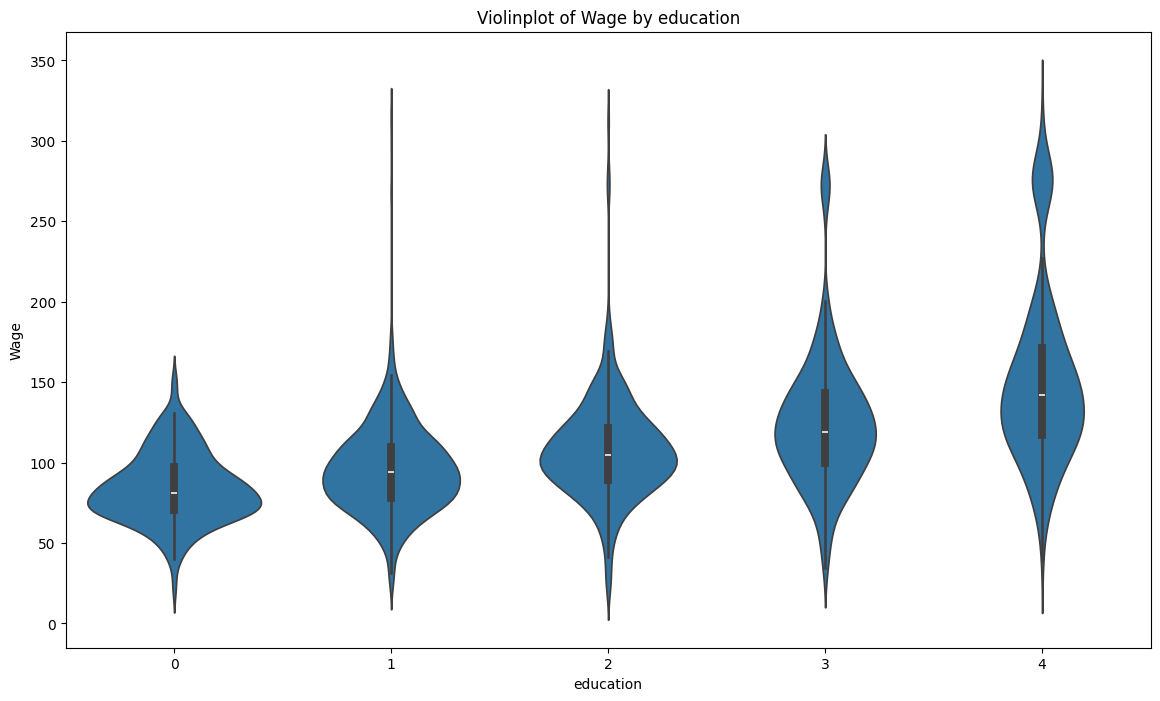

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


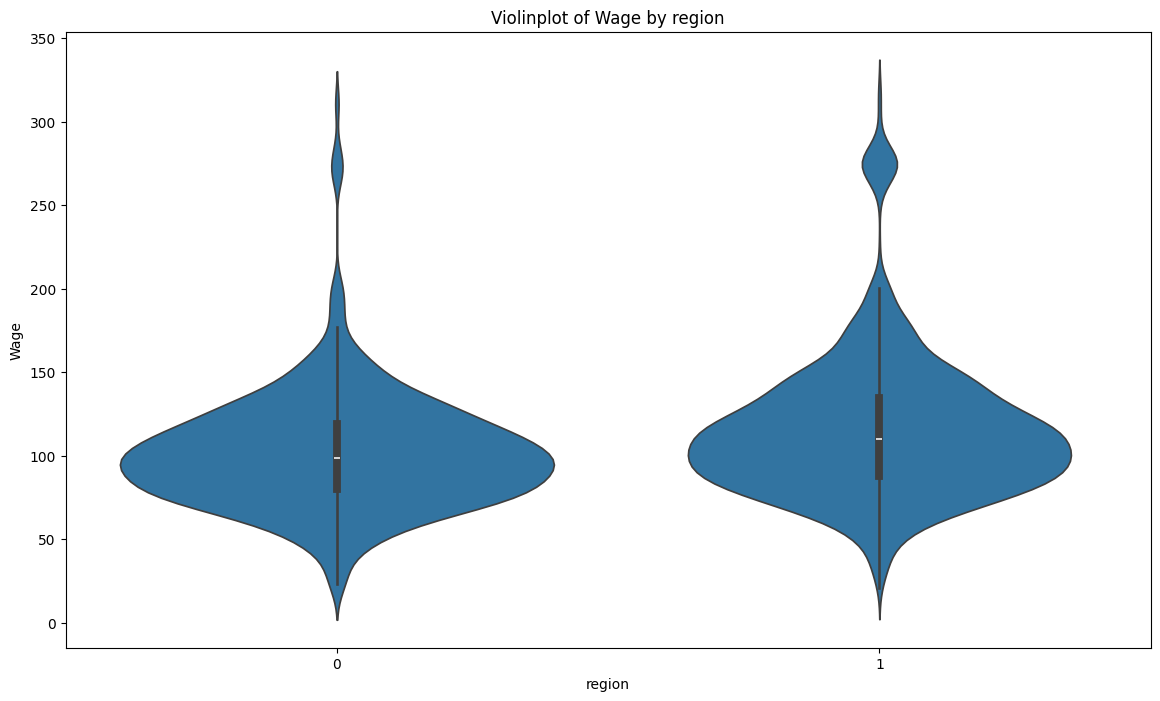

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


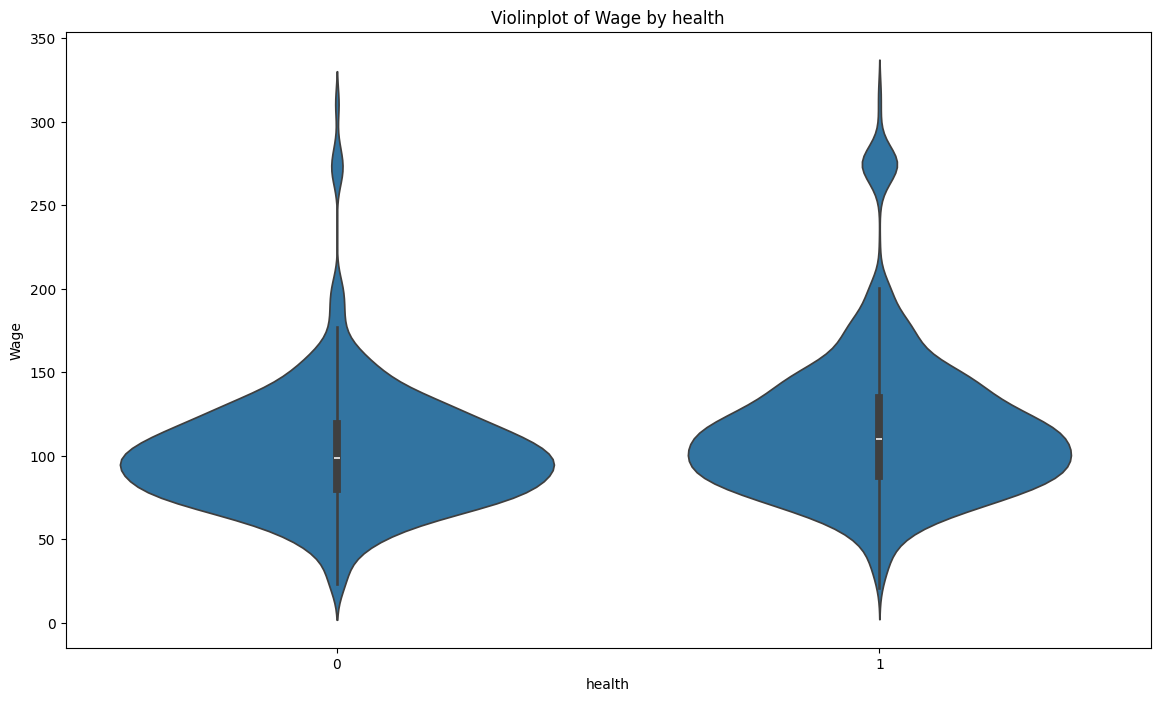

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


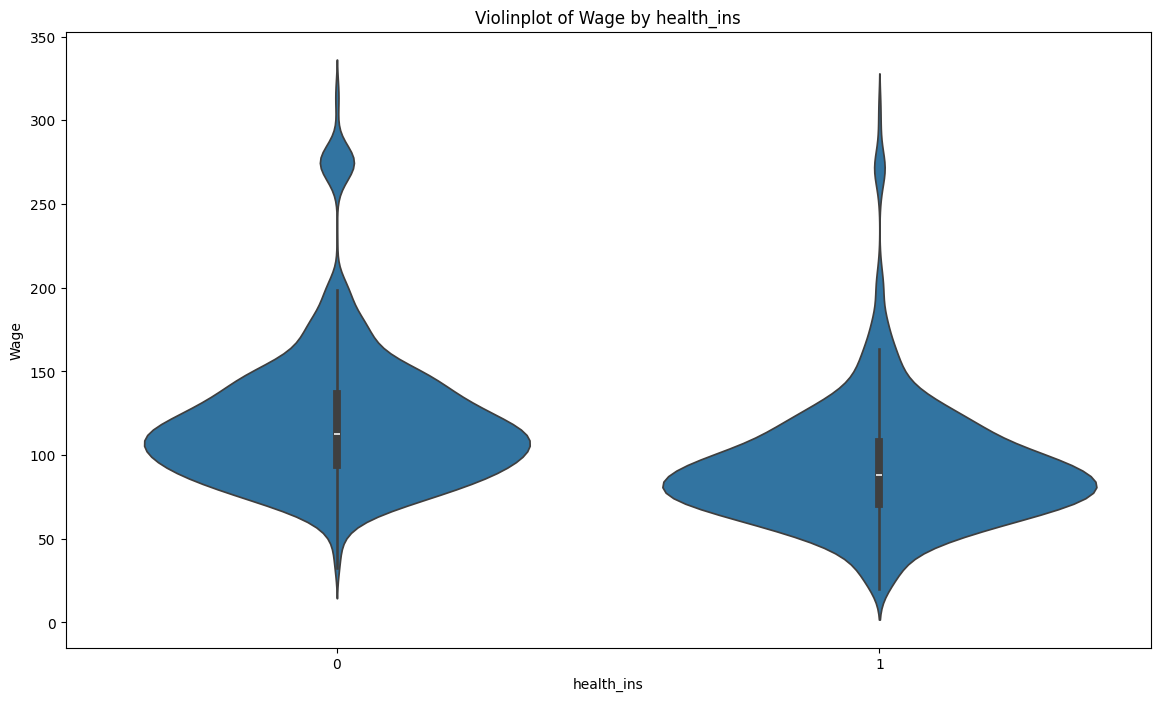

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

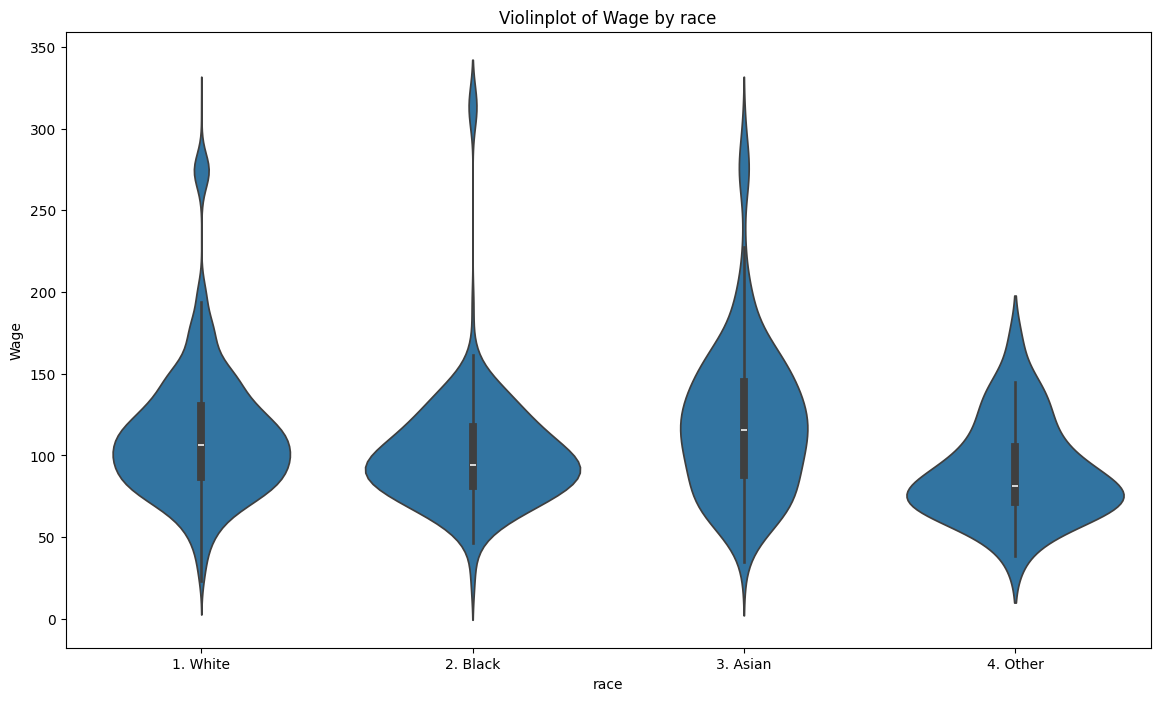

In [ ]:
makeViolinPlot(categorical)

In [ ]:
# Seems there is a strong correlation between our target and these categorical variables except with region so we will remove that one

In [ ]:
categorical.remove('region')


ValueError: list.remove(x): x not in list

In [ ]:
features.remove('wage')
features.remove('logwage')

In [ ]:
encoded_cols = sk.preprocessing.OrdinalEncoder(categories = 'auto', dtype = int, handle_unknown = 'use_encoded_value', unknown_value = -2, encoded_missing_value= -1).fit_transform(wage[categorical])

In [ ]:

for c, col in enumerate(categorical):
  wage[col] = encoded_cols[:, c]
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,0,0,0,0,0,0,1,4.318063,75.043154
1,2004,24,0,0,3,1,1,1,1,4.255273,70.476020
2,2003,45,1,0,2,0,0,0,0,4.875061,130.982177
3,2003,43,1,2,3,1,1,1,0,5.041393,154.685293
4,2005,50,3,0,1,0,1,0,0,4.318063,75.043154


In [ ]:
#Baseline model is what we will make now that we have turned the categorical variables to useable data
# We have also delt with missing data
print(features, categorical)

['year', 'age'] ['jobclass', 'maritl', 'education', 'health', 'health_ins', 'race']


In [ ]:
f = 'year + cr(age, df =3) + jobclass + maritl + education + health + health_ins + race'
X_df0 = dmatrix(f, wage)
y = np.asarray(wage['wage'])

In [ ]:
model0 = sm.OLS(y, X_df0).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     157.8
Date:                Thu, 11 Jul 2024   Prob (F-statistic):          9.40e-245
Time:                        17:07:48   Log-Likelihood:                -14867.
No. Observations:                3000   AIC:                         2.975e+04
Df Residuals:                    2990   BIC:                         2.981e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1828.9019    467.520     -3.912      0.000   -2745.596    -912.208
x1             1.2507      0.311      4.025      0.000       0.641       1.860
x2          -624.1636    155.765     -4.007      0.000    -929.580    -318.747
x3          -588.8455    155.801     -3.779      0.000    -894.334    -283.357
x4          -615.8928    156.012     -3.948      0.000    -921.795    -309.991
x5             3.4056      1.330      2.560      0.011       0.797       6.014
x6            -0.0751      0.831     -0.090      0.928      -1.705       1.555
x7            13.4099      0.560     23.928      0.000      12.311      14.509
x8             7.2323      1.434      5.042      0.000       4.420      10.045
x9           -15.8510      1.425    -11.126      0.000     -18.645     -13.058
x10           -1.8650      1.007     -1.852      0.064      -3.840       0.110
==============================================================================
Omnibus:                     1159.557   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6711.943
Skew:                           1.735   Prob(JB):                         0.00
Kurtosis:                       9.454   Cond. No.                     1.39e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.21e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# Seems health and health insurance are closely related so lets combine them

In [ ]:
f = 'year + cr(age, df =3) + jobclass + maritl + education + health:health_ins + race'
data = {'year': wage['year'], 'age': wage['age'], 'jobclass' : wage['jobclass'], 'maritl': wage['maritl'],
        'education': wage['education'], 'health': wage['health'], 'health_ins': wage['health_ins'], 'race': wage['race']}
X_df1 = dmatrix(f, data)
y = np.asarray(wage['wage'])


In [ ]:
model1 = sm.OLS(y, X_df1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     159.2
Date:                Thu, 11 Jul 2024   Prob (F-statistic):          5.32e-224
Time:                        17:07:54   Log-Likelihood:                -14918.
No. Observations:                3000   AIC:                         2.985e+04
Df Residuals:                    2991   BIC:                         2.991e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1813.5179    475.412     -3.815      0.0

In [ ]:
#Check MSE for model0 and model1
pred0 = model0.predict(X_df0)
pred1 = model1.predict(X_df1)
print(np.mean((pred0 - y)**2), np.mean((pred1 - y)**2))

1180.1130141632661 1220.7520088295303


In [ ]:
# So ourbaseline will be Model0. Now we will try to fit a GAM

In [285]:
from pygam import LinearGAM, s, f
import numpy as np
def getGAMerror(X_train, X_test, y_train, y_test, features):


  # Define the GAM model with correct term specifications
  gam_ = LinearGAM(
      s(0) +  # Smooth term for 'year'
      s(1, n_splines=4) +  # Smooth term for 'age' with 4 splines
      f(2) +  # Factor term for 'jobclass'
      f(3) +  # Factor term for 'maritl'
      f(4) +  # Factor term for 'education'
      f(5) +  # Factor term for 'health'
      f(6)    # Factor term for 'race'
  )

  # Fit the model
  gam_full = gam_.fit(X_train[features], y_train)
  pred = gam_full.predict(X_test[features])
  return np.mean((pred - y_test)**2)


In [ ]:
def getBaselinError(X_train, X_test, y_train, y_test, features):
  pred = sm.OLS(y_train, X_train[features]).fit().predict(X_test[features])
  return np.mean((pred - y_test)**2)


In [263]:
tot_features = ['year', 'age', 'jobclass', 'maritl', 'education', 'health', 'race']
categorical_ = ['jobclass', 'maritl', 'education', 'health', 'race']

In [265]:
encoded_cols = sk.preprocessing.OrdinalEncoder(categories = 'auto', dtype = int, handle_unknown = 'use_encoded_value', unknown_value = -2, encoded_missing_value= -1).fit_transform(wage[categorical_])

for c, cat in enumerate(categorical_):
  wage[cat] = encoded_cols[:, c]


In [274]:
X_train, X_test, y_train, y_test = skm.train_test_split(wage[tot_features], wage['wage'], test_size = .25, random_state = 0)
X_train.columns

Index(['year', 'age', 'jobclass', 'maritl', 'education', 'health', 'race'], dtype='object')

In [275]:
getBaselinError(X_train, X_test, y_train, y_test, tot_features)

1449.8837685416822

In [286]:
getGAMerror(X_train, X_test, y_train, y_test, tot_features)

1368.7845233686483

### Results (7) -

We see that the GAM error is significantly less than the regular linear regression with condensed variables. This is what we expect since we are using splines which when used correctly should better predict the data. More could be done here of course, we could cross validate the splines on each feature. Then use stepwise or best subset selection to reduce the variables. OR we could use a lasso, ridge regression, PCR, PLS to eliminate further noise from variables.

## Question -8. Fit some of the non-linear models investigated in this chapter to the Auto data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer.

In [288]:
auto = load_data('Auto')

In [289]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [293]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [294]:
categorical = ['cylinders', 'origin']
features = ['horsepower', 'displacement', 'weight', 'acceleration']
target = 'mpg'

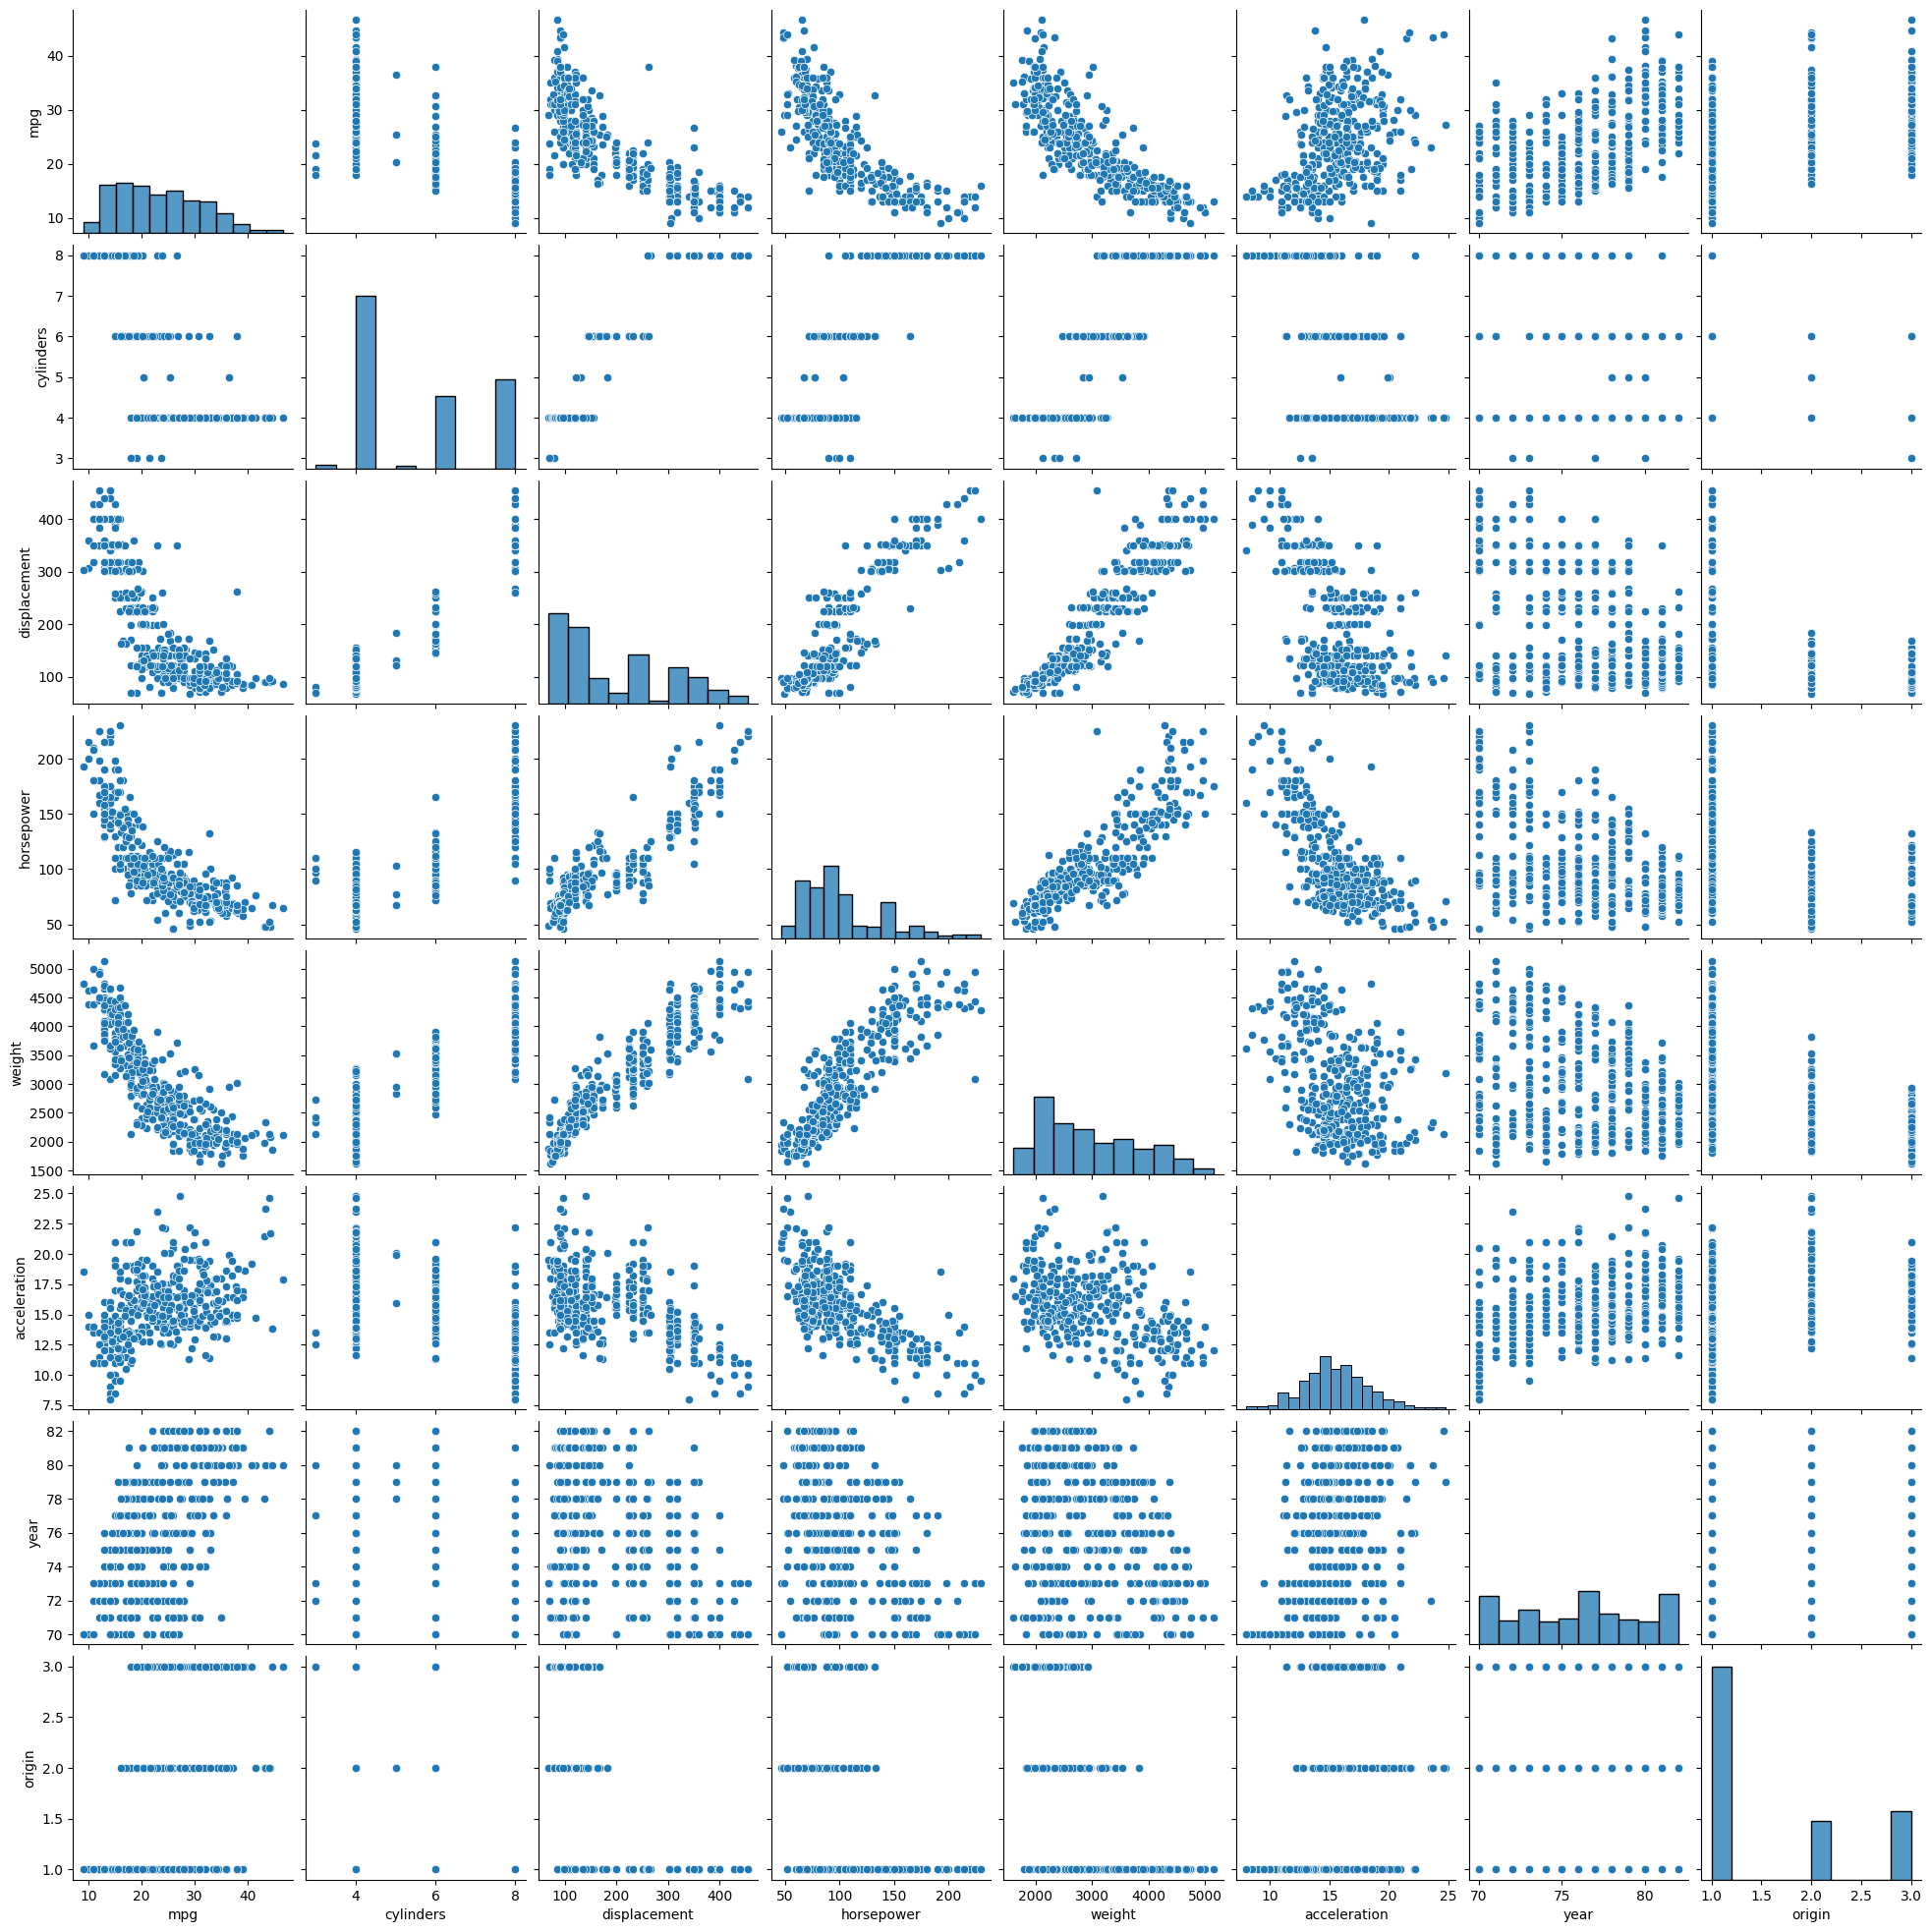

In [296]:
sns.pairplot(auto)

In [297]:
# Looks like there could be a non linear relationship with weight, horsepower, acceleration, and cylinders.
# We will use a step function for cylinders as it looks like that
# WE will use splines for weight, horsepower, and acceleration

In [298]:
X_train, X_test, y_train , y_test = skm.train_test_split(auto['cylinders'], auto[target], test_size = .2, random_state = 0)

In [300]:
errors = stepFunction(X_train, y_train, X_test, y_test, 15)

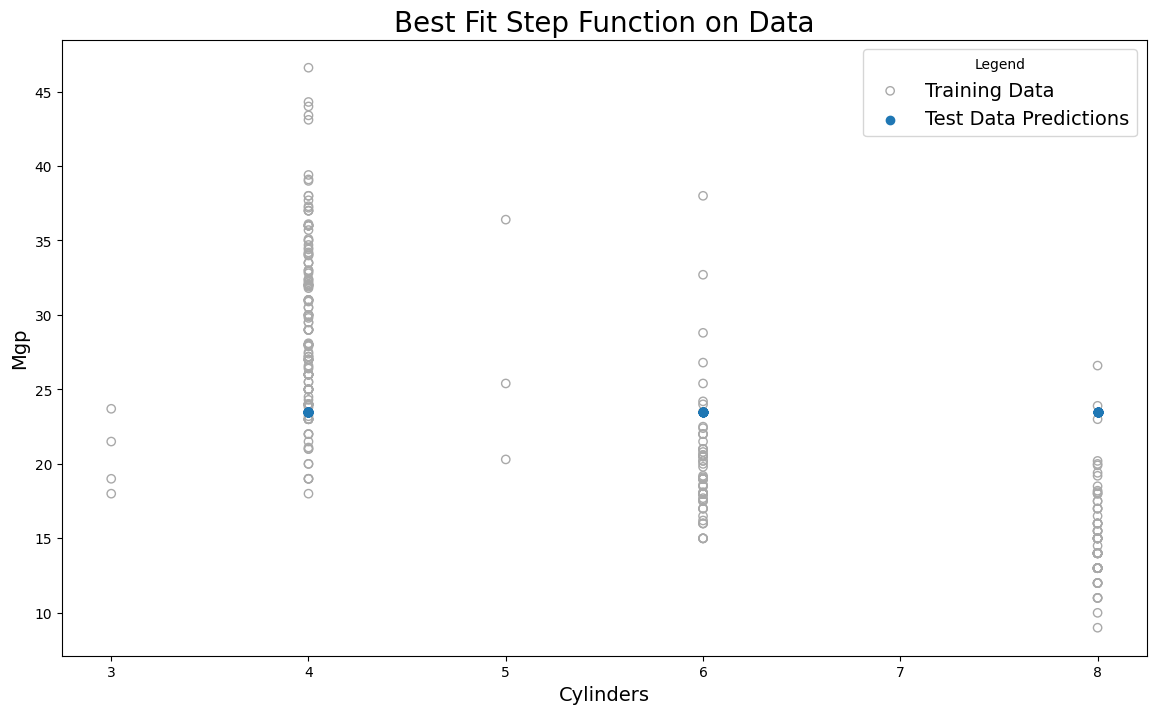

In [319]:
xName, yName = 'Cylinders', 'Mgp'
min_step = np.argmin(errors, axis = 0)
stepCutPlot(X_train, y_train, X_test, y_test, min_step, xName, yName)


In [320]:
X_train, X_test, y_train , y_test = skm.train_test_split(auto['acceleration'], auto[target], test_size = .2, random_state = 0)

In [323]:
errors = polyCrossValidation(X_train, y_train, 15)
np.argmin(errors)

3

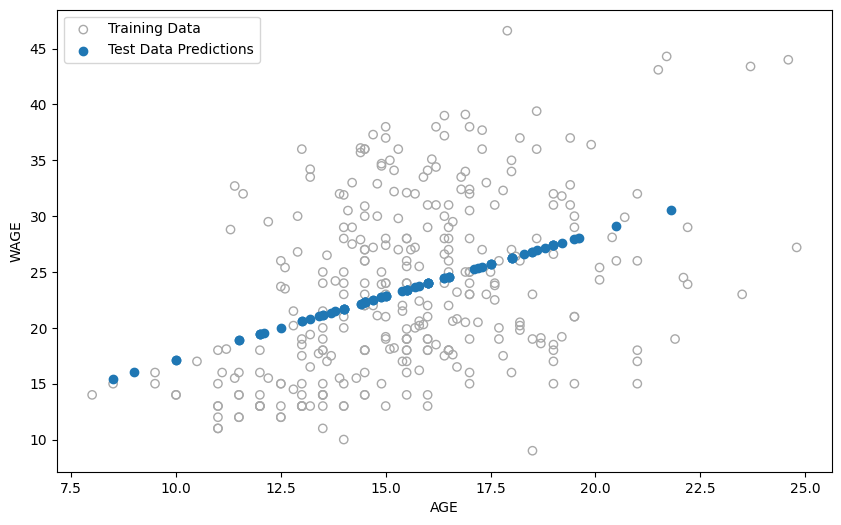

In [322]:
polyDegreePlot(X_train, y_train, X_test, y_test, np.argmin(errors))
#Polynomial of degree 3 so indeed nonlinear gives the least error

In [324]:
X_train, X_test, y_train , y_test = skm.train_test_split(auto['weight'], auto[target], test_size = .2, random_state = 0)

In [325]:
X_train.min(), X_train.max()

(1613, 5140)

In [341]:
X_test.min(), X_test.max()

(1773, 4997)

In [357]:
bs_ = BSpline(internal_knots = [2000,3000,4000,5000], intercept = True).fit_transform(X_train)
bs_test = BSpline(internal_knots = [2000,3000,4000, 4500], intercept = True).fit_transform(X_test)
bs_.shape, y_train.shape, bs_test.shape, y_test.shape

((313, 8), (313,), (79, 8), (79,))

In [349]:
model = sm.OLS(y_train, bs_).fit()
pred = model.predict(bs_test)
score = np.mean((pred - y_test)**2)
score

19.974136942000957

In [359]:
bs_.shape

(313, 8)

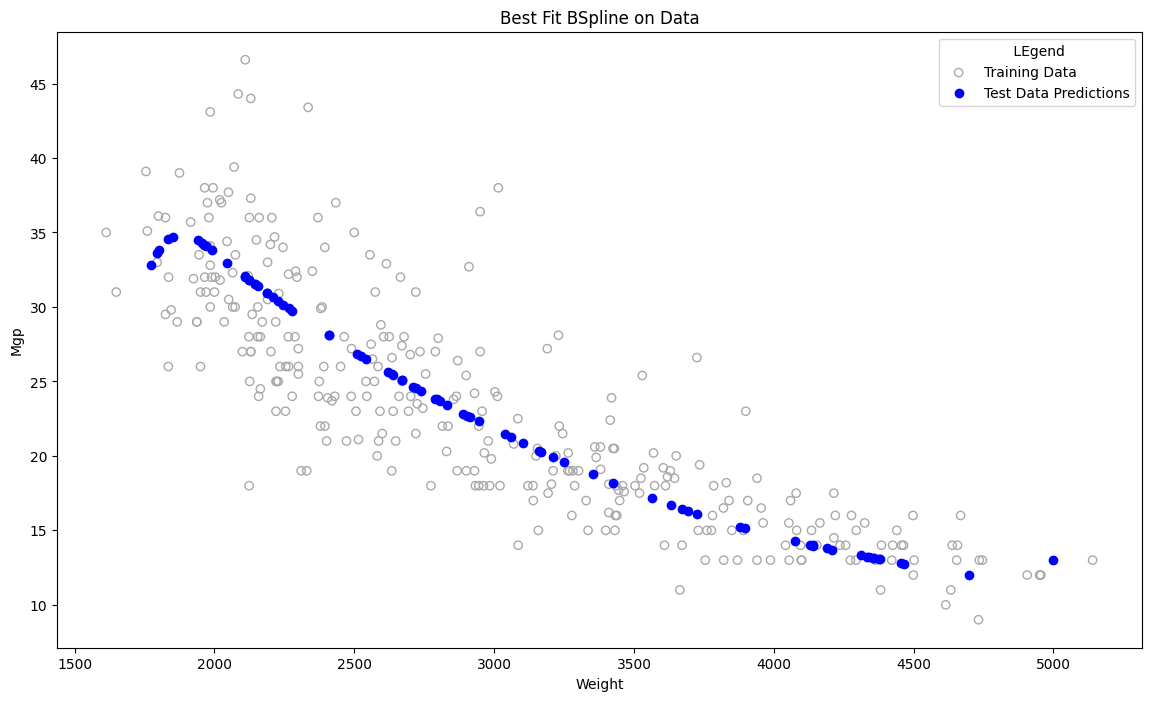

In [361]:
plt.figure(figsize = (14,8))
plt.scatter(X_train, y_train, facecolors = 'none', edgecolors = 'darkgray', label = 'Training Data')
plt.scatter(X_test, pred, label = 'Test Data Predictions', color = 'blue')
plt.xlabel('Weight')
plt.ylabel('Mgp')
plt.legend(title = ' LEgend')
plt.title('Best Fit BSpline on Data')
plt.show()

In [362]:
#NonLinear relationship explained using Bspline

In [363]:
X_train, X_test, y_train , y_test = skm.train_test_split(auto['horsepower'], auto[target], test_size = .2, random_state = 0)

In [364]:
ns_horse = NaturalSpline(df=4).fit_transform(X_train)
ns_horse_test = NaturalSpline(df=4).fit_transform(X_test)

model = sm.OLS(y_train, ns_horse).fit()
pred = model.predict(ns_horse_test)
score = np.mean((pred - y_test)**2)
score

65.57833371647342

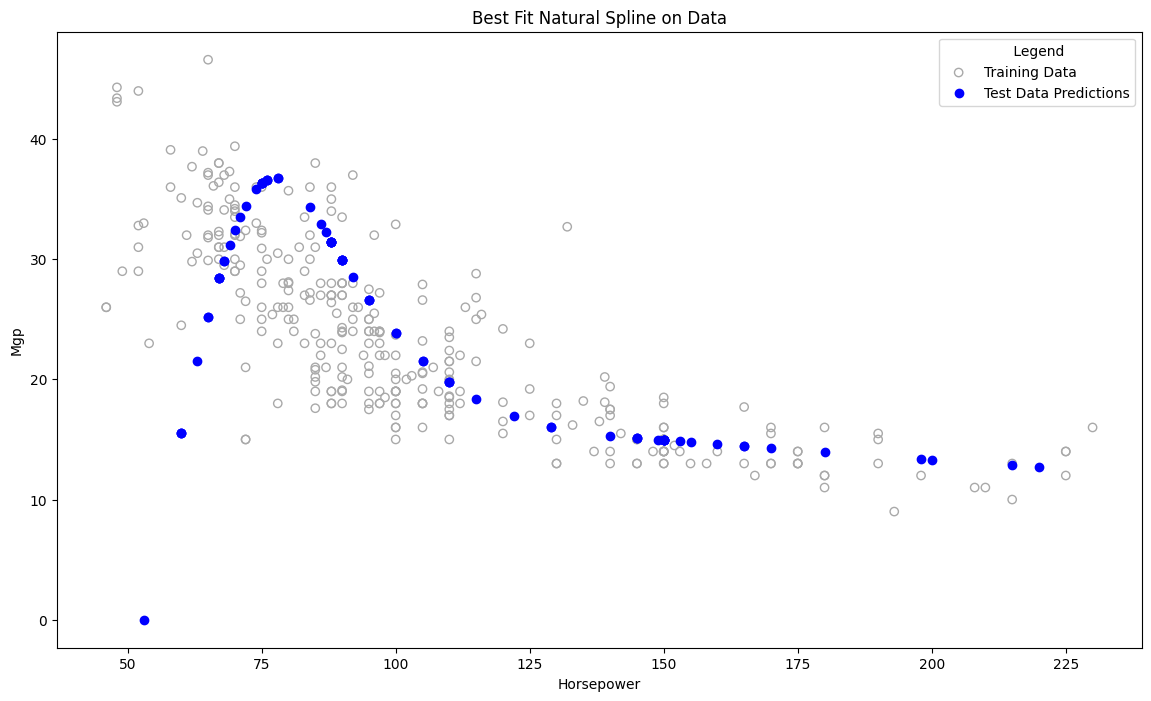

In [365]:
plt.figure(figsize = (14,8))
plt.scatter(X_train, y_train, facecolors = 'none', edgecolors = 'darkgray', label = 'Training Data')
plt.scatter(X_test, pred, label = 'Test Data Predictions', color = 'blue')
plt.xlabel('Horsepower')
plt.ylabel('Mgp')
plt.legend(title = ' Legend')
plt.title('Best Fit Natural Spline on Data')
plt.show()

In [366]:
# The last non-line relationship explained. This time we used a natural spline and as you can see it is not linear.

## Question 9. This question uses the variables $dis$ (the weighted mean of distances to five Boston employment centers) and $nox$ (nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat $dis$ as the predictor and $nox$ as the response.

### (a) Use the poly() function from the ISLP.models module to fit a cubic polynomial regression to predict $nox$ using $dis$. Report the regression output, and plot the resulting data and polynomial fits.